In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import creditcard_ml.core.feature_engineering as fe

importlib.reload(fe)


from sklearn.metrics import (
    roc_auc_score, precision_score, recall_score,
    f1_score, accuracy_score, confusion_matrix, roc_curve
)

from joblib import load
from creditcard_ml.core.feature_engineering import build_features


In [3]:
BASE_DIR = os.getcwd()

SCALER_AMOUNT_PATH = "../src/creditcard_ml/model/scaler_amount.pkl"
SCALER_TIME_PATH   = "../src/creditcard_ml/model/scaler_time.pkl"
MODEL_PATH         = "../src/creditcard_ml/model/model.pkl"

DATA_PATH          = "../data/processed.csv"
METRICS_PATH       = "../metrics.json"

print("Scaler Amount:", os.path.exists(SCALER_AMOUNT_PATH))
print("Scaler Time:", os.path.exists(SCALER_TIME_PATH))
print("Model:", os.path.exists(MODEL_PATH))
print("Data:", os.path.exists(DATA_PATH))
print("Metrics:", os.path.exists(METRICS_PATH))


Scaler Amount: True
Scaler Time: True
Model: True
Data: True
Metrics: True


In [4]:
df = pd.read_csv(DATA_PATH)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,scaled_amount,scaled_time,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.244964,-1.996583,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,-0.342475,-1.996583,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1.160686,-1.996562,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.140534,-1.996562,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,-0.073403,-1.996541,0


In [13]:
metrics_old = {}

if os.path.exists(METRICS_PATH):
    with open(METRICS_PATH) as f:
        metrics_old = json.load(f)

metrics_old


{'global': {'auc': 0.9914398663797412,
  'precision': 0.9873150105708245,
  'recall': 0.9491869918699187,
  'f1': 0.9678756476683937,
  'accuracy': 0.9998911543606723,
  'confusion_matrix': [[284309, 6], [25, 467]],
  'explanation': 'As métricas (precision, recall, f1-score e AUC) são calculadas automaticamente considerando a classe positiva do modelo, correspondente ao valor 1 no conjunto de dados.'},
 'features': ['Time',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6',
  'V7',
  'V8',
  'V9',
  'V10',
  'V11',
  'V12',
  'V13',
  'V14',
  'V15',
  'V16',
  'V17',
  'V18',
  'V19',
  'V20',
  'V21',
  'V22',
  'V23',
  'V24',
  'V25',
  'V26',
  'V27',
  'V28',
  'Amount',
  'scaled_amount',
  'scaled_time'],
 'n_features': 32}

In [12]:
# Separa X e y
X = df.drop(columns=["Class"])
y = df["Class"]

# Aplica feature engineering
X_transformed = build_features(X.copy(), is_train=False)

# Carrega modelo
model = load(MODEL_PATH)

# Previsões
y_pred = model.predict(X_transformed)
y_prob = model.predict_proba(X_transformed)[:, 1]

# Métricas recalculadas com explicação embutida
metrics_new = {
    "global": {
        "auc": roc_auc_score(y, y_prob),
        "precision": precision_score(y, y_pred),
        "recall": recall_score(y, y_pred),
        "f1": f1_score(y, y_pred),
        "accuracy": accuracy_score(y, y_pred),
        "confusion_matrix": confusion_matrix(y, y_pred).tolist(),
        "explanation": (
            "As métricas (precision, recall, f1-score e AUC) são calculadas "
            "automaticamente considerando a classe positiva do modelo, "
            "correspondente ao valor 1 no conjunto de dados."
        )
    },
    "features": list(X_transformed.columns),
    "n_features": X_transformed.shape[1],
}

# Salvar metrics.json atualizado
with open(METRICS_PATH, "w") as f:
    json.dump(metrics_new, f, indent=4)

metrics_new


{'global': {'auc': 0.9914398663797412,
  'precision': 0.9873150105708245,
  'recall': 0.9491869918699187,
  'f1': 0.9678756476683937,
  'accuracy': 0.9998911543606723,
  'confusion_matrix': [[284309, 6], [25, 467]],
  'explanation': 'As métricas (precision, recall, f1-score e AUC) são calculadas automaticamente considerando a classe positiva do modelo, correspondente ao valor 1 no conjunto de dados.'},
 'features': ['Time',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6',
  'V7',
  'V8',
  'V9',
  'V10',
  'V11',
  'V12',
  'V13',
  'V14',
  'V15',
  'V16',
  'V17',
  'V18',
  'V19',
  'V20',
  'V21',
  'V22',
  'V23',
  'V24',
  'V25',
  'V26',
  'V27',
  'V28',
  'Amount',
  'scaled_amount',
  'scaled_time'],
 'n_features': 32}

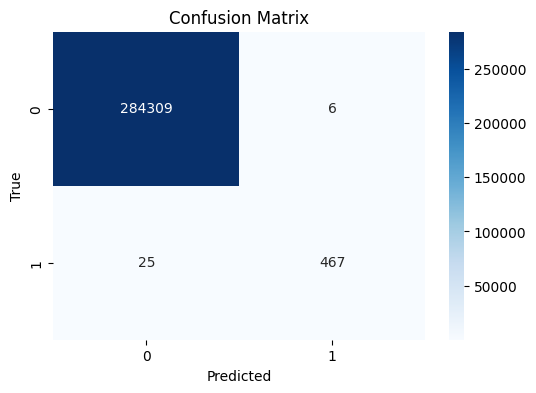

In [7]:
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()


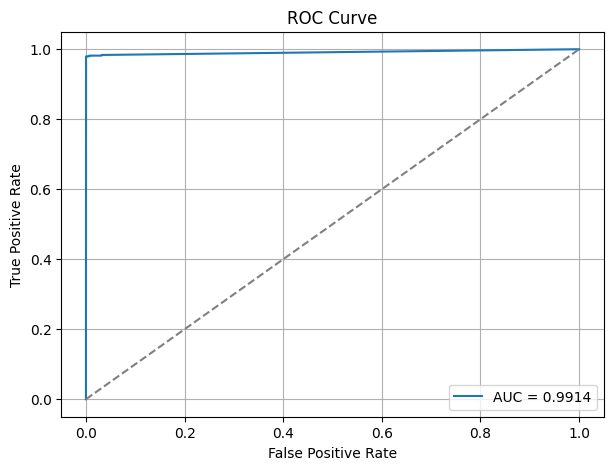

In [8]:
fpr, tpr, _ = roc_curve(y, y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {metrics_new['global']['auc']:.4f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


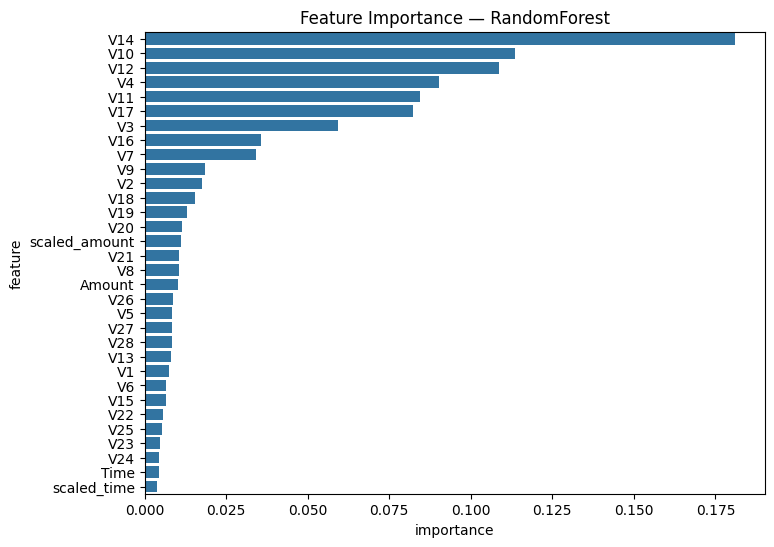

,feature,importance
14,V14,0.181017
10,V10,0.113464
12,V12,0.108764
4,V4,0.090423
11,V11,0.084379
17,V17,0.082439
3,V3,0.059463
16,V16,0.035721
7,V7,0.034325
9,V9,0.018554


In [9]:
importances = model.feature_importances_
feature_names = list(X_transformed.columns)

feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(y="feature", x="importance", data=feat_imp)
plt.title("Feature Importance — RandomForest")
plt.show()

feat_imp.head(15)


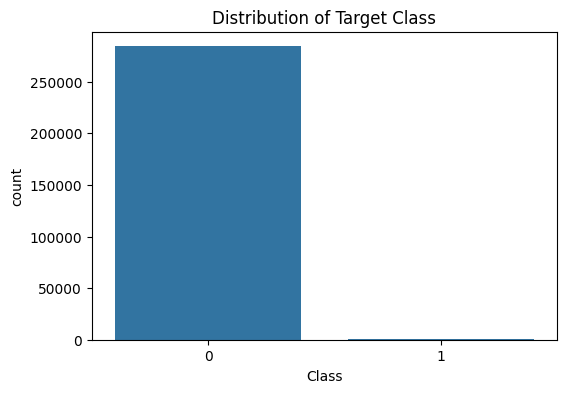

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Class"])
plt.title("Distribution of Target Class")
plt.show()

df["Class"].value_counts(normalize=True)


In [ ]:
import os
from datetime import datetime

model_path = "../src/creditcard_ml/model/model.pkl"
scaler_amount_path = "../src/creditcard_ml/model/scaler_amount.pkl"
scaler_time_path = "../src/creditcard_ml/model/scaler_time.pkl"

for f in [model_path, scaler_amount_path, scaler_time_path]:
    print(f"\nFILE: {f}")
    print("Exists:", os.path.exists(f))

    if os.path.exists(f):
        print("Last modified:", datetime.fromtimestamp(os.path.getmtime(f)))



FILE: ../src/creditcard_ml/model/model.pkl
Exists: True
Last modified: 2025-12-02 12:51:49.051663

FILE: ../src/creditcard_ml/model/scaler_amount.pkl
Exists: True
Last modified: 2025-12-02 12:46:47.183881

FILE: ../src/creditcard_ml/model/scaler_time.pkl
Exists: True
Last modified: 2025-12-02 12:46:47.184881
